# 통합데이터 EDA - 빈도분석

> ## 1) 한글 폰트 설치

- 나눔폰트 설치

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

- 설치 확인

In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/shar

In [ ]:
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic


- 적용하려면 '런타임 다시 시작' 진행

Text(0.5, 1.0, '안녕')

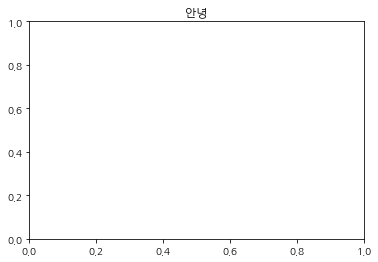

In [ ]:
plt.title('안녕')
# '안녕' 출력 확인

> ## 2) EDA - 빈도분석


- 엑셀파일 불러오기
  - dataset_final.xlsx

- Googl Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dataset_final_Revise.xlsx'

-rw------- 1 root root 1604769 Apr 13 04:02 '/content/drive/My Drive/Colab Notebooks/datasets/dataset_final_Revise.xlsx'


- 통합 파일 'dataset_final_Revise.xlsx' 불러오기 & 데이터 확인

In [ ]:
import pandas as pd

df = pd.read_excel('dataset_final_Revise.xlsx', engine='openpyxl') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40644 entries, 0 to 40643
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sentence     40644 non-null  object 
 1   Emotion      40644 non-null  object 
 2   Unnamed: 2   0 non-null      float64
 3   Unnamed: 3   3 non-null      object 
 4   Unnamed: 4   3 non-null      object 
 5   Unnamed: 5   3 non-null      object 
 6   Unnamed: 6   3 non-null      object 
 7   Unnamed: 7   3 non-null      object 
 8   Unnamed: 8   3 non-null      object 
 9   Unnamed: 9   3 non-null      object 
 10  Unnamed: 10  3 non-null      object 
dtypes: float64(1), object(10)
memory usage: 3.4+ MB


In [ ]:
df.head()

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,게임방 가서 사광 클릭해서 대기 4600명 뚫고 성공,행복,NaN,공포,놀람,중립,분노,혐오,슬픔,행복,합계
1,신곡 지붕킥 하자,행복,NaN,5444,5999,6000,5999,5808,5394,5999,40643
2,VR로 즐길 듯 기대되네,행복,NaN,13.3947,14.7602,14.7627,14.7602,14.2903,13.2717,14.7602,100
3,뒷북 꿀 잼,행복,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,굿 꿩 먹고 알 먹고 누이 좋고 매부 좋고,행복,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.loc[:,['Sentence', 'Emotion']]
df.head()

,Sentence,Emotion
0,게임방 가서 사광 클릭해서 대기 4600명 뚫고 성공,행복
1,신곡 지붕킥 하자,행복
2,VR로 즐길 듯 기대되네,행복
3,뒷북 꿀 잼,행복
4,굿 꿩 먹고 알 먹고 누이 좋고 매부 좋고,행복


In [ ]:
df.tail()

,Sentence,Emotion
40639,아무래도 너와는 음식의 방향성이 안 맞을 거 같아.,중립
40640,음식 뿐만이 아닐텐데?,중립
40641,"그나저나 그 밧줄, 어떻게 할 거야? 자살은 안 한다고 했지? 장난이라고 했잖아.",중립
40642,"장난, 이긴 한데 나는 아마 그 결과를 못 볼거야. 그래서 네가 대신 확인해줬으면 ...",중립
40643,어떤 장난이길래?,중립


- 결측값 확인 및 감정별 데이터 개수 확인

In [ ]:
df['Emotion'].value_counts(dropna = False) # 없음

중립    6000
행복    6000
놀람    5999
분노    5999
혐오    5808
공포    5444
슬픔    5394
Name: Emotion, dtype: int64

- 감정별 데이터 비율 확인

In [ ]:
df['Emotion'].value_counts(normalize = True) # 슬픔과 공포가 1% 내외로 적지만 크게 차이는 없다

중립    0.147623
행복    0.147623
놀람    0.147599
분노    0.147599
혐오    0.142899
공포    0.133944
슬픔    0.132713
Name: Emotion, dtype: float64

In [ ]:
df['Sentence'].value_counts(dropna = False,
                            sort = True,
                            ascending = False) # '네, 네?, 뭐, 뭐?, 예'의 빈도가 많다.  

네                                            139
네?                                           101
뭐                                             96
뭐?                                            54
예                                             50
                                            ... 
뭐 하는 거예요 안돼요                                   1
김무성 유승민 나경원 이혜훈은 이미 배신자로 찍혔으니 나가는 게 나을 거다      1
공부만 잘한 쓰레기 벌레인가 봅니다                            1
……아, 체육제 있었지.                                  1
이게 다 누구 때문인데!                                  1
Name: Sentence, Length: 39275, dtype: int64

In [ ]:
df.describe()  

,Sentence,Emotion
count,40644,40644
unique,39275,7
top,네,중립
freq,139,6000


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- 파이 차트

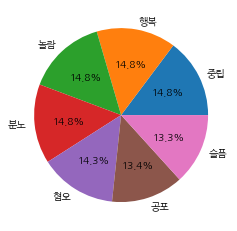

In [ ]:
emotion = df['Emotion'].value_counts(dropna = False) 
plt.pie(x = emotion, labels = emotion.index, autopct = '%.1f%%')
plt.show()

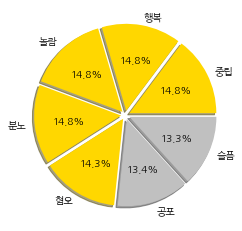

In [ ]:
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['gold','gold','gold','gold','gold','silver','silver']

plt.pie(emotion, labels= emotion.index, autopct='%.1f%%', explode = explode, 
        shadow = True, colors = colors)
plt.show()

([<matplotlib.patches.Wedge object at 0x7f182e57d050>, <matplotlib.patches.Wedge object at 0x7f182e57d810>, <matplotlib.patches.Wedge object at 0x7f182e5040d0>, <matplotlib.patches.Wedge object at 0x7f182e5049d0>, <matplotlib.patches.Wedge object at 0x7f182e510550>, <matplotlib.patches.Wedge object at 0x7f182e510e90>, <matplotlib.patches.Wedge object at 0x7f182e519490>], [Text(1.028527193862887, 0.5144237664460456, '중립'), Text(0.20529539205406455, 1.1315271989666744, '행복'), Text(-0.7821894156624752, 0.8430182192726298, '놀람'), Text(-1.1437168769188817, -0.12004876280462042, '분노'), Text(-0.604605317113784, -0.9782394443681676, '혐오'), Text(0.3575332242840319, -1.0930096035868413, '공포'), Text(1.0514864646653395, -0.4656997043434601, '슬픔')], [Text(0.5813414574007622, 0.29076125929559093, '14.8%'), Text(0.1160365259436017, 0.6395588515898594, '14.8%'), Text(-0.4421070610266164, 0.47648855871931245, '14.8%'), Text(-0.6464486695628461, -0.06785364854174197, '14.8%'), Text(-0.34173344010779083,

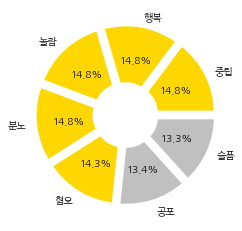

In [ ]:
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['gold','gold','gold','gold','gold','silver','silver']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(emotion, labels= emotion.index, autopct='%.1f%%', explode = explode, 
        colors = colors, wedgeprops = wedgeprops)
plt.show()